This document was created to investigate and apply neccessary additional data cleaning steps to the document `activities_cleaned.csv` located in `Running Analysis` folder.

In [173]:
import pandas as pd

import os


In [174]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
# Get the current working directory
current_dir = os.getcwd()

# Parent Directory
parent_dir = os.path.dirname(current_dir)

# Running_Archive path
Running_archive_dir = os.path.join(parent_dir, 'Running Analysis')

# Working file
file_path = os.path.join(Running_archive_dir, 'activities_cleaned.csv')


In [176]:
df = pd.read_csv(file_path)

# Check for missing values 
missing_values = df.isnull().mean() * 100
print(missing_values[missing_values > 0])

# Generate descriptive statistic for numeric columns
df.describe()


Series([], dtype: float64)


,Activity ID,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Max. Heart Rate (bpm).1,Distance (Raw),Begin Latitude (Decimal Degrees Raw),Begin Longitude (Decimal Degrees Raw),End Latitude (Decimal Degrees Raw),End Longitude (Decimal Degrees Raw),Temperature (Raw),Wind Speed (Raw),Humidity (Raw)
count,1.550000e+02,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.534023e+09,383.125613,383.125613,158.055097,158.407484,174.148387,96.941935,26.776991,48.024921,7.826712,48.025003,7.819512,18.165806,9.948387,65.322581
std,2.847469e+08,117.063615,117.063615,119.421463,118.436687,5.275271,9.664662,251.049566,0.019401,0.057301,0.019344,0.055797,6.917693,5.588478,17.519538
min,9.083326e+08,159.800000,159.800000,3.000000,3.000000,135.000000,70.000000,2.701190,48.008097,7.534500,48.009655,7.535721,-2.800000,2.000000,26.000000
25%,1.297725e+09,307.245000,307.245000,70.000000,70.095000,173.000000,95.000000,5.016340,48.024921,7.826712,48.025003,7.819512,14.450000,5.000000,53.000000
50%,1.449839e+09,326.680000,326.680000,134.500000,132.610000,174.000000,97.000000,6.107940,48.024921,7.826712,48.025003,7.819512,18.900000,10.000000,64.000000
75%,1.743754e+09,456.705000,456.705000,217.270000,218.110000,176.000000,98.000000,7.773235,48.024921,7.826712,48.025003,7.819512,22.800000,13.000000,77.000000
max,2.284659e+09,756.600000,756.600000,622.000000,624.000000,192.000000,143.000000,3132.000000,48.261844,7.984675,48.261721,7.984625,32.800000,27.000000,100.000000


#### 'Object' Dtypes

After working with the team, we discovered that some data types were incorrectly recorded as 'object' when they should not have been. This issue has created obstacles in progressing the project. To address this, we will now list all columns where the data type is 'object' and review them for necessary corrections.


In [177]:
objects_columns = df.select_dtypes(include=['object']).columns
print(objects_columns)

Index(['Activity Type', 'Begin Timestamp', 'End Timestamp',
       'Average Moving Speed', 'Average Speed', 'Max. Speed',
       'Duration (h:m:s)', 'Moving Duration (h:m:s)', 'Calories', 'Device',
       'Wind Direction', 'Condition', 'Rainfall'],
      dtype='object')


From the list, we can see that some variables should have different dtypes than object, we will dig deeper into these columns.

In [178]:
selected_columns = ['Average Moving Speed','Max. Speed','Average Speed','Duration (h:m:s)','Moving Duration (h:m:s)','Calories']

selected_columns_df = df[selected_columns]

selected_columns_df.head()


,Average Moving Speed,Max. Speed,Average Speed,Duration (h:m:s),Moving Duration (h:m:s),Calories
0,6:47,4:55,6:47,0:59:03,0:58:50,753
1,6:18,4:33,6:18,0:48:00,0:48:02,626
2,5:52,4:29,5:52,0:39:18,0:38:44,528
3,6:11,4:27,6:11,0:48:10,0:47:57,661
4,6:01,4:19,6:01,0:47:40,0:47:04,619


From here we will do neccessary transformation to these columns.
1. With speed columns: Convert from pace into km/ h.
2. With duration columns: Create duration (in seconds) columns.
3. With calories column: Directly convert to numeric with pandas.

In [179]:
# 1. Converting pace to km/ h
## During the process, we figured out there is one data point has incorrect input format for `Average Moving Speed` (indx 88).
## To reduce complexity, we manually editted this value in Excel. 

def pace_to_speed(pace):
    parts = pace.split(':')
    minutes, seconds = map(int, parts)
    pace_in_sec = (minutes * 60) + seconds
    speed_kmh = 3600.0 / pace_in_sec
    return speed_kmh

#Apply converter
df['Average Moving Speed'] = df['Average Moving Speed'].apply(pace_to_speed)
df['Max. Speed'] = df['Max. Speed'].apply(pace_to_speed)
df['Average Speed'] = df['Average Speed'].apply(pace_to_speed)


In [180]:
# Check the result
print(df[['Average Moving Speed', 'Max. Speed', 'Average Speed']].head())
print(df[['Average Moving Speed', 'Max. Speed', 'Average Speed']].isnull().sum())

   Average Moving Speed  Max. Speed  Average Speed
0              8.845209   12.203390       8.845209
1              9.523810   13.186813       9.523810
2             10.227273   13.382900      10.227273
3              9.703504   13.483146       9.703504
4              9.972299   13.899614       9.972299
Average Moving Speed    0
Max. Speed              0
Average Speed           0
dtype: int64


In [181]:
#2. Durtaion in seconds

def duration_to_seconds(duration):
    hours, minutes, seconds = map(int, duration.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

df['Duration (seconds)'] = df['Duration (h:m:s)'].apply(duration_to_seconds)
df['Moving Duration (seconds)'] = df['Moving Duration (h:m:s)'].apply(duration_to_seconds)

print(df[['Duration (h:m:s)', 'Duration (seconds)', 'Moving Duration (h:m:s)', 'Moving Duration (seconds)']].head())


  Duration (h:m:s)  Duration (seconds) Moving Duration (h:m:s)  \
0          0:59:03                3543                 0:58:50   
1          0:48:00                2880                 0:48:02   
2          0:39:18                2358                 0:38:44   
3          0:48:10                2890                 0:47:57   
4          0:47:40                2860                 0:47:04   

   Moving Duration (seconds)  
0                       3530  
1                       2882  
2                       2324  
3                       2877  
4                       2824  


In [182]:
# There are some values in 'Calories' have 4 digits and contain comma, we will deal with this before converting the column to numeric
problematic_calories = df[df['Calories'].str.contains(',', na=False) | df['Calories'].str.contains(' ', na=False)]
print(problematic_calories)


    Activity ID Activity Type   Begin Timestamp     End Timestamp  \
8    1988390950       Running  16/09/2017 12:33  16/09/2017 14:04   
21   1899798162       Running    6/8/2017 10:45    6/8/2017 12:23   
29   1842521154       Running  25/06/2017 11:00  25/06/2017 13:00   
87   1393848573       Running   6/10/2016 15:30   6/10/2016 16:53   

    Max. Elevation (Raw)  Min. Elevation (Raw)  Elevation Gain (Raw)  \
8                 677.60                677.60                525.00   
21                730.40                730.40                581.00   
29                756.60                756.60                622.00   
87                642.42                642.42                498.89   

    Elevation Loss (Raw)  Average Heart Rate (bpm)  Max. Heart Rate (bpm).1  \
8                 518.00                       170                       92   
21                577.00                       171                      101   
29                624.00                       169      

In [183]:
# Replacing commas
df['Calories'] = df['Calories'].str.replace(',', '').str.replace(' ', '')


In [184]:
# Calories to numeric
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

print(df[['Calories']].head())
print(df['Calories'].isnull().sum())


   Calories
0       753
1       626
2       528
3       661
4       619
0


In [185]:
# Check the result
result = ['Average Moving Speed','Average Speed', 'Max. Speed','Duration (seconds)', 'Moving Duration (seconds)', 'Calories']
result_columns = df[result]


print(result_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Average Moving Speed       155 non-null    float64
 1   Average Speed              155 non-null    float64
 2   Max. Speed                 155 non-null    float64
 3   Duration (seconds)         155 non-null    int64  
 4   Moving Duration (seconds)  155 non-null    int64  
 5   Calories                   155 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.4 KB
None


####
After fixing the Dtypes of some problematic columns, we also observed some inconsistency in values of Elevation and Heart Rate variables.

1. Some of the Maximum and Minimum Elevation values were observed to be exactly the same, we will confirm this and make neccessary transformation. 

2. Some of the Maximum Heart Rate values were observed to be lower than Average Heart rate, we will dig into this and make neccessary transformation. 

#### Elevation

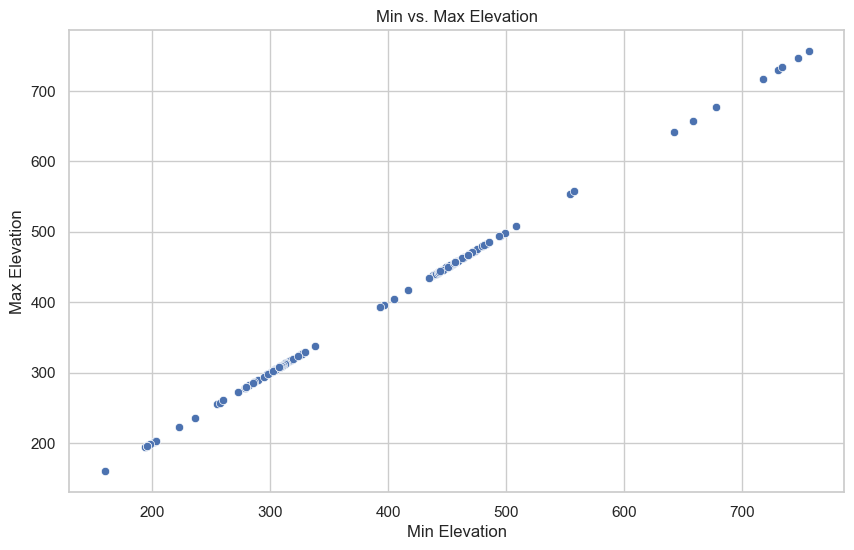

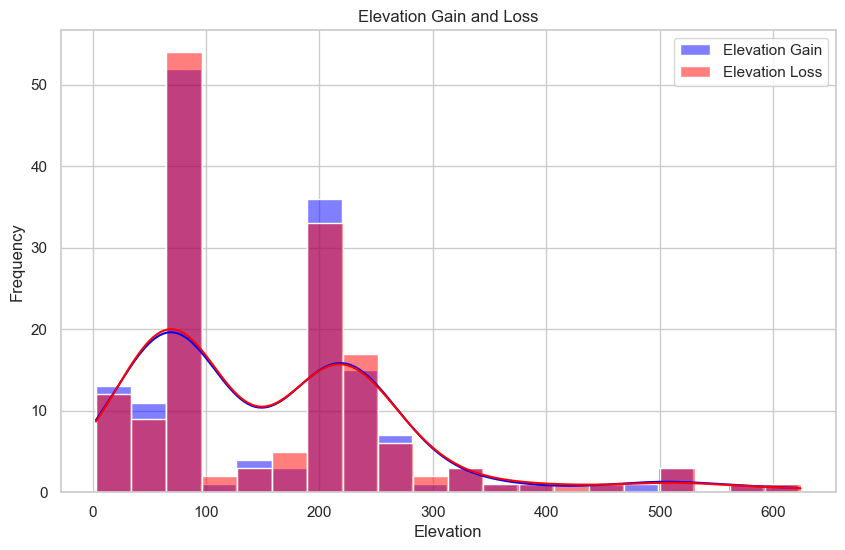

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize min vs. max elevation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min. Elevation (Raw)', y='Max. Elevation (Raw)', data=df)
plt.title('Min vs. Max Elevation')
plt.xlabel('Min Elevation')
plt.ylabel('Max Elevation')
plt.show()

# Histogram of elevation gains and losses
plt.figure(figsize=(10, 6))
sns.histplot(df['Elevation Gain (Raw)'], bins=20, kde=True, color='blue', label='Elevation Gain')
sns.histplot(df['Elevation Loss (Raw)'], bins=20, kde=True, color='red', label='Elevation Loss')
plt.title('Elevation Gain and Loss')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.legend()
plt.show()


We can clearly see that all of Maximum and Minimum Elevation values are the same, while there are still changes in elevation gain/ losses.

To deal with this problem, we will extract Elevation values from original .gpx files from 'activities' folder. This folder contains time-series data (second by second) of each activity, including `heart rate`, `cadence`, `elevation`, `longtitude`, and `lattitude`.

We will then replace the minimum elevation values from these files to the summary working file. 


In [187]:
import gpxpy

# Path to the folder containing the .gpx files
activities_dir = os.path.join(os.getcwd(), 'activites','activites')


def gpx_to_min_elevation(gpx_file):
    with open(gpx_file, 'r') as file:
        gpx = gpxpy.parse(file)
        
    elevations = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                elevations.append(point.elevation)
                
    if elevations:
        return min(elevations)
    else:
        return None

# Create a list to store min elevation values
new_min_elevations = []

# Loop over each row in the main DataFrame
for index, row in df.iterrows():
    activity_id = row['Activity ID']
    gpx_file_path = os.path.join(activities_dir, f'activity_{activity_id}.gpx')
    
    if os.path.exists(gpx_file_path):
        min_elevation = gpx_to_min_elevation(gpx_file_path)
        new_min_elevations.append(min_elevation)
    else:
        new_min_elevations.append(None)

# Replace the Min Elevation values
df['Min. Elevation (Raw)'] = new_min_elevations

# Check for null values 
null_min_elevations = df['Min. Elevation (Raw)'].isna().sum()

# Display the result
print(f"Number of null values after replacement: {null_min_elevations}")
print(df[['Activity ID', 'Min. Elevation (Raw)']].head(10))


Number of null values after replacement: 0
   Activity ID  Min. Elevation (Raw)
0   2284658991            240.800003
1   2284658936            241.800003
2   2228102647            186.399994
3   2104984694            239.399994
4   2084195352            263.600006
5   2021230223            250.000000
6   2006998728            242.000000
7   2006998614            262.799988
8   1988390950            243.199997
9   1971778346            227.600006


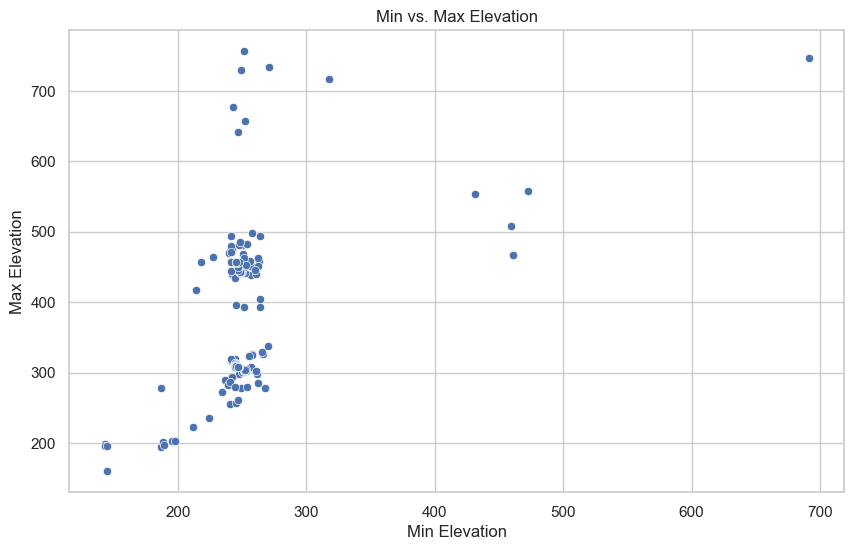

In [188]:
# Plot the elevation again
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min. Elevation (Raw)', y='Max. Elevation (Raw)', data=df)
plt.title('Min vs. Max Elevation')
plt.xlabel('Min Elevation')
plt.ylabel('Max Elevation')
plt.show()

#### Heart Rate

After observing the data, we suspect that the Max. Heart Rate (bpm).1 column in the DataFrame is actually recording the Minimum Heart Rate. To confirm this, we will extract data from the .gpx files and verify the values. Once we confirm this, we will make the necessary corrections to the DataFrame.

In [189]:
def gpx_to_heart_rates(gpx_file):
    with open(gpx_file, 'r') as file:
        gpx = gpxpy.parse(file)
        
    heart_rates = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if point.extensions:
                    for ext in point.extensions:
                        ns = {'ns3': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}
                        hr = ext.find('ns3:hr', namespaces=ns)
                        if hr is not None:
                            heart_rates.append(int(hr.text))
                
    if heart_rates:
        max_hr = max(heart_rates)
        min_hr = min(heart_rates)
        return max_hr, min_hr
    else:
        return None, None

# Create lists to store the new heart rates values
new_max_heart_rates = []
new_min_heart_rates = []

# Loop over each row in the main DataFrame
for index, row in df.iterrows():
    activity_id = row['Activity ID']
    gpx_file_path = os.path.join(activities_dir, f'activity_{activity_id}.gpx')
    
    if os.path.exists(gpx_file_path):
        max_heart_rate, min_heart_rate = gpx_to_heart_rates(gpx_file_path)
        new_max_heart_rates.append(max_heart_rate)
        new_min_heart_rates.append(min_heart_rate)
    else:
        new_max_heart_rates.append(None)
        new_min_heart_rates.append(None)


In [190]:
# Compare the GPX min heart rates with the Max. Heart Rate (bpm).1 values
df['GPX Min Heart Rate'] = new_min_heart_rates

comparison = df[['Activity ID', 'Max. Heart Rate (bpm).1', 'GPX Min Heart Rate']]
comparison['Min Heart Rate Difference'] = comparison['GPX Min Heart Rate'] - comparison['Max. Heart Rate (bpm).1']

print(comparison.head(10))

num_matches = (comparison['Min Heart Rate Difference'] == 0.0).sum()
print(f"Number of matches:{num_matches}")

   Activity ID  Max. Heart Rate (bpm).1  GPX Min Heart Rate  \
0   2284658991                      113               113.0   
1   2284658936                      100               149.0   
2   2228102647                       95               171.0   
3   2104984694                      109               109.0   
4   2084195352                      110               110.0   
5   2021230223                      101               101.0   
6   2006998728                       99               133.0   
7   2006998614                      100               100.0   
8   1988390950                       92               143.0   
9   1971778346                      123               145.0   

   Min Heart Rate Difference  
0                        0.0  
1                       49.0  
2                       76.0  
3                        0.0  
4                        0.0  
5                        0.0  
6                       34.0  
7                        0.0  
8                       51.

From the results, we can observe that the minimum heart rate values extracted from the GPX files are relatively equal to the values in the `Max. Heart Rate (bpm).1` column. This confirms our suspicion that the `Max. Heart Rate (bpm).1` column actually represents the minimum heart rate. 

Now we will replace the correct values from GPX files to the Data Frame to ensure consistency.

In [191]:
# Replace Max Heart rate values in the DataFrame and rename Min Heart rate column
df['Max. Heart Rate (bpm)'] = new_max_heart_rates

df.rename(columns={'Max. Heart Rate (bpm).1': 'Min. Heart Rate (bpm)'}, inplace=True)

# Check for null values 
null_max_heart_rates = df['Max. Heart Rate (bpm)'].isna().sum()
print(f"Null Max values: {null_max_heart_rates}")



Null Max values: 64


In [192]:
# drop redundant
df.drop(['GPX Min Heart Rate'],axis=1)

,Activity ID,Activity Type,Begin Timestamp,End Timestamp,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Min. Heart Rate (bpm),...,End Longitude (Decimal Degrees Raw),Temperature (Raw),Wind Speed (Raw),Wind Direction,Humidity (Raw),Condition,Rainfall,Duration (seconds),Moving Duration (seconds),Max. Heart Rate (bpm)
0,2284658991,Running,4/11/2017 12:07,4/11/2017 13:06,472.60,240.800003,315.00,314.00,182,113,...,7.855831,13.9,11,S,77,fair,no,3543,3530,201.0
1,2284658936,Running,3/11/2017 9:47,3/11/2017 10:35,473.20,241.800003,245.00,244.00,177,100,...,7.855922,11.1,3,N,100,fair,no,2880,2882,197.0
2,2228102647,Running,25/10/2017 16:31,25/10/2017 17:11,278.80,186.399994,208.00,272.00,179,95,...,7.855921,20.0,6,SSW,60,fair,no,2358,2324,194.0
3,2104984694,Running,13/10/2017 11:53,13/10/2017 12:41,471.60,239.399994,246.00,244.00,180,109,...,7.855894,17.2,5,SSO,72,fair,no,2890,2877,197.0
4,2084195352,Running,2/10/2017 14:51,2/10/2017 15:38,494.60,263.600006,246.00,240.00,174,110,...,7.856066,17.8,19,SW,77,mostly cloudy,no,2860,2824,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1205026379,Running,9/6/2016 14:56,9/6/2016 15:17,308.59,247.000000,67.47,69.46,174,97,...,7.819512,21.1,14,N,53,mostly clear,no,1270,1260,NaN
151,1203784563,Running,7/6/2016 9:10,7/6/2016 9:42,309.47,245.399994,70.94,73.86,174,97,...,7.819512,21.1,2,N,73,fair,no,1903,1880,NaN
152,912662907,Running,28/09/2015 17:19,28/09/2015 17:39,308.37,247.000000,52.29,55.11,174,70,...,7.819512,17.8,21,O,34,fair,no,1232,1227,199.0
153,908332579,Running,24/09/2015 12:55,24/09/2015 13:16,307.23,247.000000,62.46,64.20,186,115,...,7.819512,16.1,8,WSW,59,mostly clear,no,1275,1275,201.0


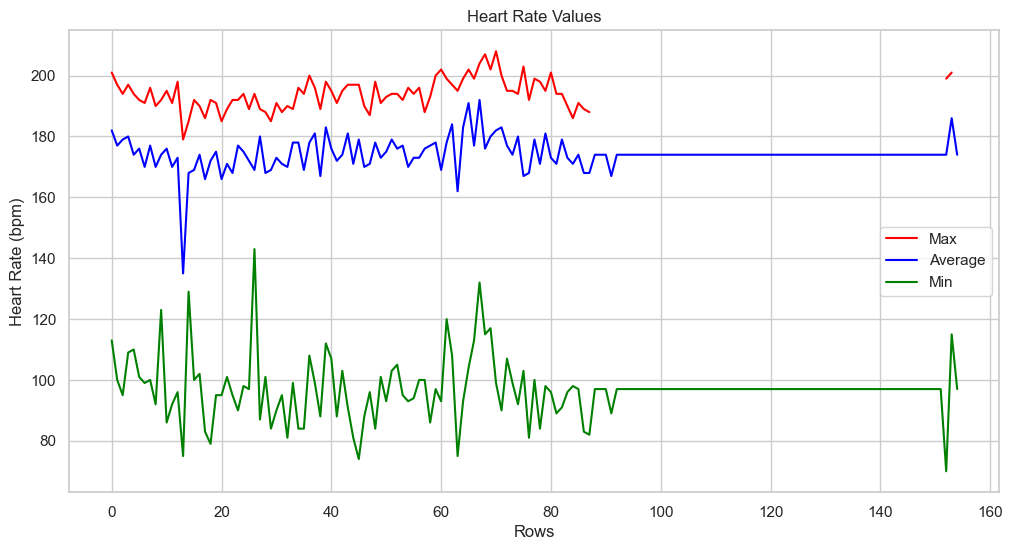

In [193]:
plt.figure(figsize=(12, 6))

plt.plot(df['Max. Heart Rate (bpm)'], label='Max', color='red')
plt.plot(df['Average Heart Rate (bpm)'], label='Average', color='blue')
plt.plot(df['Min. Heart Rate (bpm)'], label='Min', color='green')
plt.title('Heart Rate Values')
plt.xlabel('Rows')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid(True)
plt.show()


After replacing Max Heart Rate values and Plotting Min and Average values, we can see that there is a period of training where the Heart Rate were not recorded at all. 

These values have previously been replaced with `mean` values. However this is not an optimal way to replace these values, as this can lead to unrealistic data, especially when Heart Rates values are crucial for performance analysis. 

To address this, we will investigate the relationship between Heart Rate values with other variables like speed, elevation, cadence, and duration to estimate the heart rate.

#### Cadence

First we need to Extract average cadence value from the GPX files as they were not recorded in the csv file.

In [194]:
import gpxpy

def gpx_to_cadence(gpx_file):
    with open(gpx_file, 'r') as file:
        gpx = gpxpy.parse(file)
        
    cadences = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if point.extensions:
                    for ext in point.extensions:
                        ns = {'ns3': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}
                        cad = ext.find('ns3:cad', namespaces=ns)
                        if cad is not None:
                            cadences.append(int(cad.text))  # Use cad.text instead of hr.text
                
    if cadences:
        avg_cadence = sum(cadences) / len(cadences)
        return avg_cadence
    else:
        return None

# Create a list to store the new cadence values
new_cadences = []

# Loop over each row in the main DataFrame
for index, row in df.iterrows():
    activity_id = row['Activity ID']
    gpx_file_path = os.path.join(activities_dir, f'activity_{activity_id}.gpx')
    
    if os.path.exists(gpx_file_path):
        avg_cadence = gpx_to_cadence(gpx_file_path)
        new_cadences.append(avg_cadence)  # Append the average cadence
    else:
        new_cadences.append(None)

# Add the new cadence values to the DataFrame
df['Average Cadence'] = new_cadences



Now we will remove all values of `Average Heart Rate` and `Min. Heart Rate` where `Max. Heart Rate` is zero. These are the observations that do not have heart rate values recorded.

In [195]:
# identify rows with missing Max. Heart Rate and clear the values for avg and min HR
missing_max_hr_indices = df[df['Max. Heart Rate (bpm)'].isna()].index
df.loc[missing_max_hr_indices, 'Average Heart Rate (bpm)'] = None
df.loc[missing_max_hr_indices, 'Min. Heart Rate (bpm)'] = None


Then we will plot the relationships between HR values and other metrics

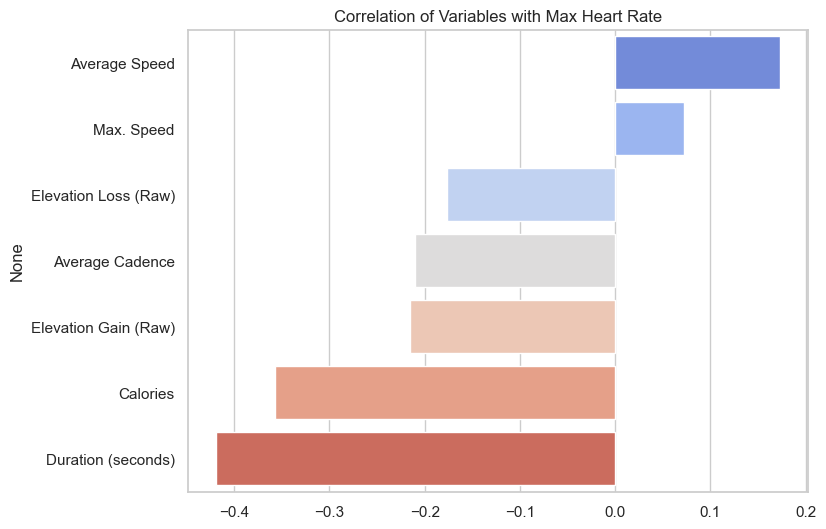

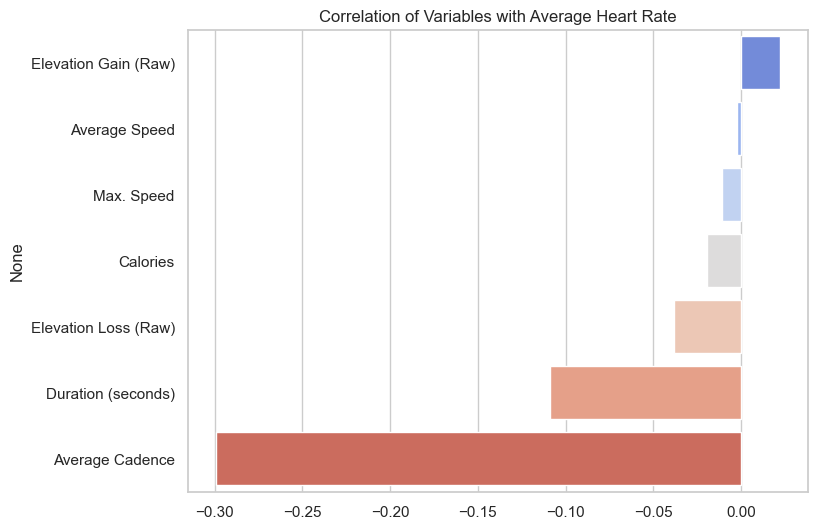

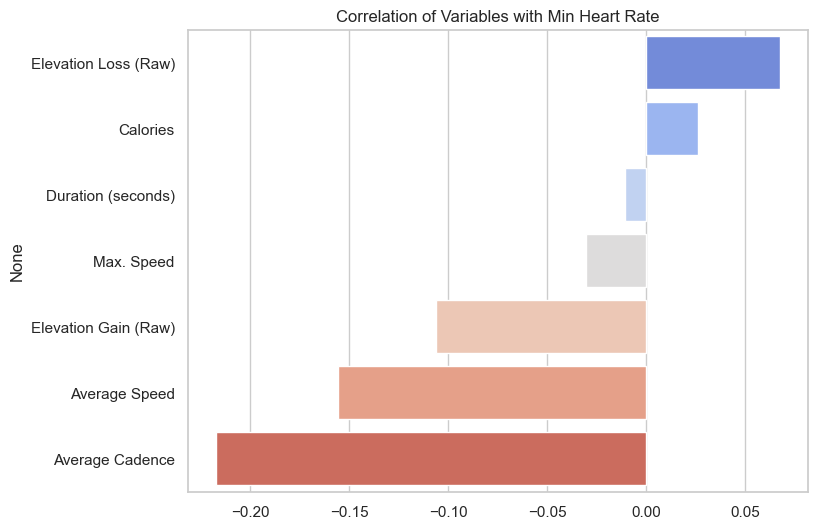

In [196]:
# Create a DataFrame with complete heart rate data
df_complete_hr = df.dropna(subset=['Max. Heart Rate (bpm)', 'Average Heart Rate (bpm)', 'Min. Heart Rate (bpm)'])

# Define the metrics to analyze
columns_to_analyze = ['Average Speed', 'Max. Speed', 'Average Cadence', 'Duration (seconds)', 'Calories', 'Elevation Gain (Raw)', 'Elevation Loss (Raw)']

# correlation with Max Heart Rate
corr_with_max_hr = df_complete_hr[['Max. Heart Rate (bpm)'] + columns_to_analyze].corr()['Max. Heart Rate (bpm)'].sort_values(ascending=False)
corr_with_max_hr = corr_with_max_hr.drop('Max. Heart Rate (bpm)')  

# correlation with Average Heart Rate
corr_with_avg_hr = df_complete_hr[['Average Heart Rate (bpm)'] + columns_to_analyze].corr()['Average Heart Rate (bpm)'].sort_values(ascending=False)
corr_with_avg_hr = corr_with_avg_hr.drop('Average Heart Rate (bpm)')  

# correlation with Min Heart Rate
corr_with_min_hr = df_complete_hr[['Min. Heart Rate (bpm)'] + columns_to_analyze].corr()['Min. Heart Rate (bpm)'].sort_values(ascending=False)
corr_with_min_hr = corr_with_min_hr.drop('Min. Heart Rate (bpm)') 

# Plotting Max Heart Rate
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_max_hr.values, y=corr_with_max_hr.index, palette='coolwarm')
plt.title('Correlation of Variables with Max Heart Rate')
plt.show()

# Plotting Average Heart Rate
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_avg_hr.values, y=corr_with_avg_hr.index, palette='coolwarm')
plt.title('Correlation of Variables with Average Heart Rate')
plt.show()

# Plotting Min Heart Rate
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_min_hr.values, y=corr_with_min_hr.index, palette='coolwarm')
plt.title('Correlation of Variables with Min Heart Rate')
plt.show()

Base on the plot result above, we will apply a Linear Regression Model to train and predict missing HR values, using the following variables:

- `Average Speed`,
- `Average Cadence`,
- `Duration (seconds)`,
- `Elevation Gain (Raw)`,
- `Elevation Loss (Raw)`.

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Definefeatures and target
features = ['Average Speed', 'Average Cadence', 'Duration (seconds)', 'Elevation Gain (Raw)', 'Elevation Loss (Raw)']
target_max_hr = 'Max. Heart Rate (bpm)'
target_avg_hr = 'Average Heart Rate (bpm)'
target_min_hr = 'Min. Heart Rate (bpm)'

# Max Heart Rate
df_complete_max_hr = df_complete_hr
X_train, X_test, y_train_max, y_test_max = train_test_split(df_complete_max_hr[features], df_complete_hr[target_max_hr], test_size=0.2, random_state=42)
model_max_hr = LinearRegression()
model_max_hr.fit(X_train, y_train_max)
y_pred_max = model_max_hr.predict(X_test)
# Evaluate the model
mae_max = mean_absolute_error(y_test_max, y_pred_max)
r2_max = r2_score(y_test_max, y_pred_max)
print(f"MAE for Max Heart Rate: {mae_max}")
print(f"R² for Max Heart Rate: {r2_max}")


# Avg Heart Rate
df_complete_avg_hr = df_complete_hr
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(df_complete_avg_hr[features], df_complete_hr[target_avg_hr], test_size=0.2, random_state=42)
model_avg_hr = LinearRegression()
model_avg_hr.fit(X_train_avg, y_train_avg)
y_pred_avg = model_avg_hr.predict(X_test_avg)
# Evaluate the model 
mae_avg = mean_absolute_error(y_test_avg, y_pred_avg)
r2_avg = r2_score(y_test_avg, y_pred_avg)
print(f"MAE for Average Heart Rate: {mae_avg}")
print(f"R² for Average Heart Rate: {r2_avg}")

# Min Heart Rate
df_complete_min_hr = df_complete_hr
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(df_complete_min_hr[features], df_complete_hr[target_min_hr], test_size=0.2, random_state=42)
model_min_hr = LinearRegression()
model_min_hr.fit(X_train_min, y_train_min)
y_pred_min = model_min_hr.predict(X_test_min)
# Evaluate the modekl
mae_min = mean_absolute_error(y_test_min, y_pred_min)
r2_min = r2_score(y_test_min, y_pred_min)
print(f"MAE for Min Heart Rate: {mae_min}")
print(f"R² for Min Heart Rate: {r2_min}")


MAE for Max Heart Rate: 2.7653668825762976
R² for Max Heart Rate: 0.550667190424514
MAE for Average Heart Rate: 3.553698286026368
R² for Average Heart Rate: 0.27850621266850795
MAE for Min Heart Rate: 10.424318340971984
R² for Min Heart Rate: 0.1855407276751041


We also did explore several advanced models, including Random Forest and Gradient Boosting, to predict heart rate metrics, but unfortunately, the results were rather disappointing

The linear regression model, while its performance was not ideal, yielded the most reliable results, offering the best fit among the models tested. The result provided a reasonable balance between accuracy and simplicity.

Therefore, we have decided to proceed with this model to predict missing values in our dataset, prioritizing reduced complexity to move forward with other tasks.

In [198]:
# Predict and fill the missing Max Heart Rate values 
missing_max_hr = df[df[target_max_hr].isnull()]
X_missing_max_hr = missing_max_hr[features]
predicted_max_hr = model_max_hr.predict(X_missing_max_hr)
df.loc[df[target_max_hr].isnull(), target_max_hr] = predicted_max_hr

# Predict and fill the missing Average Heart Rate values 
missing_avg_hr = df[df[target_avg_hr].isnull()]
X_missing_avg_hr = missing_avg_hr[features]
predicted_avg_hr = model_avg_hr.predict(X_missing_avg_hr)
df.loc[df[target_avg_hr].isnull(), target_avg_hr] = predicted_avg_hr

# Predict and fill the missing Min Heart Rate values 
missing_min_hr = df[df[target_min_hr].isnull()]
X_missing_min_hr = missing_min_hr[features]
predicted_min_hr = model_min_hr.predict(X_missing_min_hr)
df.loc[df[target_min_hr].isnull(), target_min_hr] = predicted_min_hr


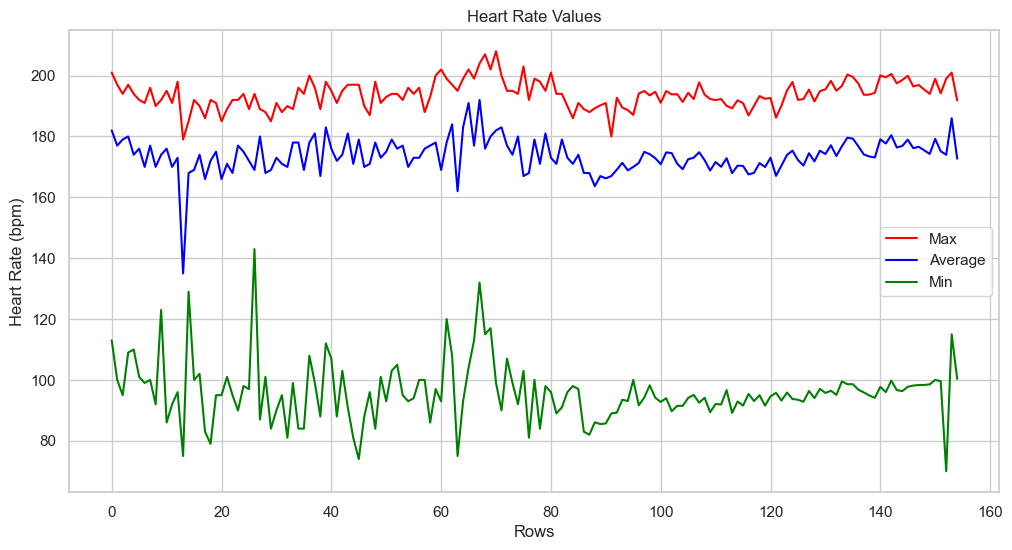

In [199]:
# Plot Heart rate values again

plt.figure(figsize=(12, 6))

plt.plot(df['Max. Heart Rate (bpm)'], label='Max', color='red')
plt.plot(df['Average Heart Rate (bpm)'], label='Average', color='blue')
plt.plot(df['Min. Heart Rate (bpm)'], label='Min', color='green')
plt.title('Heart Rate Values')
plt.xlabel('Rows')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid(True)
plt.show()


In [200]:
df.to_csv('Fixed_cleaned_activities.csv', index=False)
